# Hello world to mechine learning - MNIST MLP



## step1. 匯入模組
目前先匯入處理資料的模組
mnist 路徑: ~/.keras/datasets/mnist.npz (numpy file)

In [1]:
import numpy as np
import pandas as pd
import keras.utils as np_utils  # this is use to transfer label into one-hot-encoding
from keras.datasets import mnist

Using TensorFlow backend.


## step2. 匯入資料

另外把資料印出來看看內容

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(x_test.shape)   # (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


可視化圖形結果

In [3]:
import matplotlib.pyplot as plt

def printimage(image,title_of_image):
    plt.figure()
    plt.figure(figsize=(2,2))
    plt.imshow(image,cmap='binary')
    plt.title(title_of_image)
    plt.show()
    
printimage(x_train[0], y_train[0]) 

<Figure size 640x480 with 0 Axes>

<Figure size 200x200 with 1 Axes>

## step3. 資料預處理
輸入的資料我們必須先給他們做預處理，這一步我們有幾件事需要做
1. 把輸入的資料每一筆化為一維向量
2. 特徵標準化資料(nomalization)
3. 把label data轉為one-hot-encoding

In [4]:
x_train_data = x_train.reshape(60000,-1).astype('float32')/255  
x_test_data = x_test.reshape(10000,-1).astype('float32')/255

print(x_train_data.shape)

y_train_data = np_utils.to_categorical(y_train)
y_test_data = np_utils.to_categorical(y_test)

print('y_label: ', y_train[0], ', and y_train shape:', y_train.shape)
print('after one hot encoding: ', y_train_data[0],'\ny_train_data shape: ', y_train_data.shape)

(60000, 784)
y_label:  5 , and y_train shape: (60000,)
after one hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 
y_train_data shape:  (60000, 10)


## step4. 建立模型
MLP 多層感知機可拆成三個部分
1. 輸入層，其輸入神經元必須與輸入檔案的大小需要一致，在這為28*28=784
2. 隱藏層，我們在隱藏層設定激活函數(activation function)與神經元數量
3. 輸出層，神經元數量必須與輸出大小匹配，在這裡為10

以下我們利用Keras的Sequential mode與Dense全連結層

In [5]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()  # construct the model
model.add(Dense(units=100,input_dim=784,activation='relu',kernel_initializer='normal'))
model.add(Dense(units=10,activation='softmax',kernel_initializer='normal'))

#show the model summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## step5. 進行訓練

定義訓練方式
在compile內定義
1. loss function 2.optimizer 一般梯度下降法我們會使用adam

進行訓練
在fit內設定
1. training data 2.taining data label 3. validation split 4. batch_size 5. epochs

    * validation_split代表著要把train data 分多少比例出來當作validation set
    * batch size 代表每一次update weight 共利用幾筆data
    * epochs 表示共利用全部的data訓練的次數

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

train_history= model.fit(x_train_data,y_train_data,validation_split=0.2,batch_size=100,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.4647 - acc: 0.8783 - val_loss: 0.2480 - val_acc: 0.9287
Epoch 2/10
48000/48000 [==============================] - 1s 28us/step - loss: 0.2196 - acc: 0.9374 - val_loss: 0.1819 - val_acc: 0.9493
Epoch 3/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.1633 - acc: 0.9529 - val_loss: 0.1494 - val_acc: 0.9593
Epoch 4/10
48000/48000 [==============================] - 1s 30us/step - loss: 0.1296 - acc: 0.9619 - val_loss: 0.1327 - val_acc: 0.9619
Epoch 5/10
48000/48000 [==============================] - 2s 32us/step - loss: 0.1068 - acc: 0.9690 - val_loss: 0.1171 - val_acc: 0.9666
Epoch 6/10
48000/48000 [==============================] - 1s 29us/step - loss: 0.0896 - acc: 0.9736 - val_loss: 0.1068 - val_acc: 0.9682
Epoch 7/10
48000/48000 [==============================] - 1s 28us/step - loss: 0

可視化我們的訓練結果，在此我們利用存在train_history的data

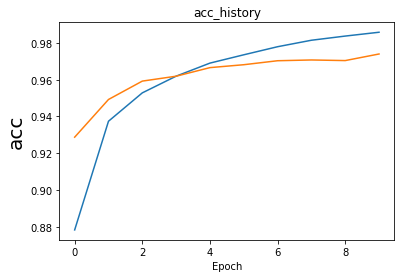

In [7]:
import matplotlib.pyplot as plt

def plot_train_result(train_history,train,val):
    plt.figure()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[val])
    plt.title(train+'_history')
    plt.xlabel('Epoch')
    plt.ylabel(train,fontsize=20)
    plt.show()
    
plot_train_result(train_history,'acc','val_acc')

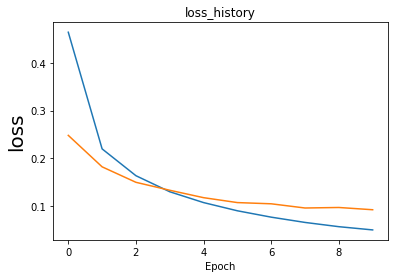

In [8]:
plot_train_result(train_history,'loss','val_loss')

我們可以看到loss 與 accuracy 都隨著訓練次數增加而有更好的表現

## step6. inference step
在這一步我們要利用test data來評估我們的模型在測試資料上的準確率

利用evaluate來預測模型

In [9]:
score=model.evaluate(x_test_data,y_test_data)
predict = model.predict_classes(x_test_data)
print('Accuary of test data: %.1f'%(score[1]*100))

10000/10000 [==============================] - 0s 28us/step
Accuary of test data: 97.5


印出10筆data來看看結果

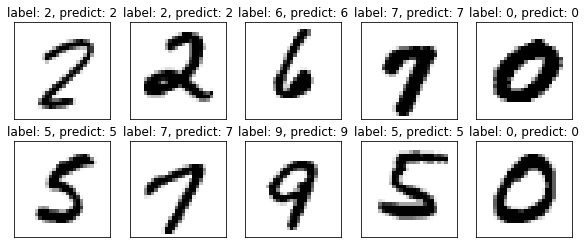

In [10]:
def printdata(data, label, predict):
    plt.figure(figsize=(10,4))
    idx=1;
    for i in np.random.randint(0,10000,10):
        ax = plt.subplot(2,5,idx)
        idx+=1
        ax.imshow(data[i],cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('label: '+str(label[i])+', predict: '+str(predict[i]))
    plt.show()

printdata(x_test,y_test,predict)

當模型訓練好以後我們想要儲存我們的模型可以利用以下的方法
* 儲存模型: 利用to_json() 方式儲存
* 儲存權重: 利用save_weights('檔名')
* 儲存模型與權重: 利用save儲存成HDF5檔案

以上會把檔案存到當前目錄下

https://keras.io/getting-started/faq/#how-can-i-save-a-keras-model

In [14]:
# method 1
model_to_json = model.to_json() 
with open('model.config', 'w') as f:
    f.write(model_to_json)

# method 2
model.save_weights('model.weight')

# method 3
model.save('model.h5')

當我們要讀取儲存的模型時，可以使用以下方法
* 利用model_from_json，把模型讀取回來
* 利用load_model直接讀取HDF5檔案

In [16]:
from keras.models import model_from_json, load_model

# load model and weight
with ('model.config','r') as f:
    model = model_from_json(f.read())
    model.load_weights('model.weight')
    
# or load hold model from HDF5

del model # erase previous model

model.load_model('model.h')